# Import Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import pickle

# Auxiliar functions

In [2]:
def regression_metrics(y, y_pred, model_name, data_set):
    mae = mean_absolute_error(y,y_pred)
    mse = np.sqrt(mean_squared_error(y,y_pred))
    r2 = r2_score(y,y_pred)
    print(model_name + " Model "+ data_set + " Metrics")
    print("MAE:", round(mae, 2))
    print("RMSE:", round(mse, 2))
    print("R2:", round(r2, 2), "\n")

# Import Data

In [3]:
DATA_PROCESSED_PATH = '../data/processed/'

In [4]:
train_data = pd.read_csv(DATA_PROCESSED_PATH + 'train_data_transformed_columns.csv')

In [5]:
train_data.shape

(8523, 9)

In [6]:
train_data.head()

,onehotencoder__Outlet_Location_Type_Tier 1,onehotencoder__Outlet_Location_Type_Tier 2,onehotencoder__Outlet_Type_Grocery Store,onehotencoder__Outlet_Type_Supermarket Type1,onehotencoder__Outlet_Type_Supermarket Type3,remainder__Item_Visibility,remainder__Item_MRP,remainder__Outlet_Size,remainder__Item_Outlet_Sales
0,1.0,0.0,0.0,1.0,0.0,0.016047,249.8092,1.0,3735.1380
1,0.0,0.0,0.0,0.0,0.0,0.019278,48.2692,1.0,443.4228
2,1.0,0.0,0.0,1.0,0.0,0.016760,141.6180,1.0,2097.2700
3,0.0,0.0,1.0,0.0,0.0,0.000000,182.0950,1.0,732.3800
4,0.0,0.0,0.0,1.0,0.0,0.000000,53.8614,2.0,994.7052


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   onehotencoder__Outlet_Location_Type_Tier 1    8523 non-null   float64
 1   onehotencoder__Outlet_Location_Type_Tier 2    8523 non-null   float64
 2   onehotencoder__Outlet_Type_Grocery Store      8523 non-null   float64
 3   onehotencoder__Outlet_Type_Supermarket Type1  8523 non-null   float64
 4   onehotencoder__Outlet_Type_Supermarket Type3  8523 non-null   float64
 5   remainder__Item_Visibility                    8523 non-null   float64
 6   remainder__Item_MRP                           8523 non-null   float64
 7   remainder__Outlet_Size                        8523 non-null   float64
 8   remainder__Item_Outlet_Sales                  8523 non-null   float64
dtypes: float64(9)
memory usage: 599.4 KB


# Data Model Preparation

## Separate dependent and independent variables

In [8]:
X=train_data.drop('remainder__Item_Outlet_Sales',axis=1)
y=train_data['remainder__Item_Outlet_Sales']

## Split data for training and validation

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=0)

In [10]:
X_train.shape

(6818, 8)

In [11]:
X_val.shape

(1705, 8)

## Scale data

In [12]:
scaler=StandardScaler()

In [13]:
X_train=scaler.fit_transform(X_train)

In [14]:
X_val=scaler.transform(X_val)

# Model Experimentation

## Linear Regression Model

In [15]:
linear_regression=LinearRegression()

In [16]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred_train=linear_regression.predict(X_train)
y_pred_val=linear_regression.predict(X_val)

### Linear Regression Model Evaluation

In [18]:
regression_metrics(y_train, y_pred_train, "Linear Regression", "Train")
regression_metrics(y_val, y_pred_val, "Linear Regression", "Validation")

Linear Regression Model Train Metrics
MAE: 833.44
RMSE: 1128.93
R2: 0.56 

Linear Regression Model Validation Metrics
MAE: 850.45
RMSE: 1130.01
R2: 0.56 



Let us recall the values taken by the target variable:

In [19]:
train_data['remainder__Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: remainder__Item_Outlet_Sales, dtype: float64

**Observations**

Let's analyze the metrics obtained in the validation set.
- R2 = 0.56: This means that 56% of the variation in the "Item_Outlet_Sales" can be explained by the predictor variables. Therefore, we should try to find a model with better results.
- MAE = 854.89: Unlike the mean squared error (MSE), the MAE calculates the error on the same scale as the data. This means that our model has an average absolute error in the prediction of the variable "Item_Outlet_Sales" in a magnitude of almost 855 sales values (we do not know if they are grams, or some monetary unit). 
Since the target variable moves in a range between 33 and 13000 approx., and the average sales is 1794, we see that it is an error that can be considered not so bad, but it can have an impact in predicting with that margin of error.
- We use RMSE to have the error expressed in the same unit as the target variable.

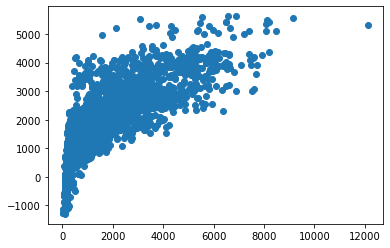

In [20]:
plt.scatter(y_val, y_pred_val)

## Polynomial Regression Model

In [21]:
polynomial_reg = PolynomialFeatures(degree = 2)

In [22]:
x_polynomial = polynomial_reg.fit_transform(X)

In [23]:
X_train_pol, X_val_pol, y_train_pol, y_val_pol = train_test_split(x_polynomial, y, test_size=0.20, random_state=0)

In [24]:
polynomial_linear_reg = LinearRegression()

In [25]:
polynomial_linear_reg.fit(X_train_pol,y_train_pol)

LinearRegression()

In [26]:
y_pred_pol_train = polynomial_linear_reg.predict(X_train_pol)
y_pred_pol_val = polynomial_linear_reg.predict(X_val_pol)

### Polynomial Regression Model Evaluation

In [27]:
regression_metrics(y_train_pol, y_pred_pol_train, "Polynomial Regression", "Train")
regression_metrics(y_val_pol, y_pred_pol_val, "Polynomial Regression", "Validation")

Polynomial Regression Model Train Metrics
MAE: 747.19
RMSE: 1069.26
R2: 0.61 

Polynomial Regression Model Validation Metrics
MAE: 762.59
RMSE: 1076.45
R2: 0.6 



We can see better validation metrics in this polynomial model (compared to linear regression). With a lower MAE and a higher R2.

## Random Forest Regression Model

In [28]:
r_forest = RandomForestRegressor(n_estimators = 100, random_state = 42)
r_forest.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [29]:
y_pred_train=r_forest.predict(X_train)
y_pred_val=r_forest.predict(X_val)

### Random Forest Regression Model Evaluation

In [30]:
regression_metrics(y_train, y_pred_train, "Random Forest Regression", "Train")
regression_metrics(y_val, y_pred_val, "Random Forest Regression", "Validation")

Random Forest Regression Model Train Metrics
MAE: 297.66
RMSE: 432.67
R2: 0.94 

Random Forest Regression Model Validation Metrics
MAE: 826.57
RMSE: 1154.54
R2: 0.54 



We can see that in this Random Forest model we did not obtain better validation metrics than in the polynomial model.

##  Support Vector Machine Regression Model

In [31]:
svr=SVR()

In [32]:
param_grid={'kernel':['linear','poly',],
            'gamma':['scale','auto'],
            'degree':[2,3],
            'epsilon':[1,2]}

In [33]:
grid_model=GridSearchCV(svr,param_grid=param_grid,cv=5, verbose=10)

In [34]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START degree=2, epsilon=1, gamma=scale, kernel=linear............
[CV 1/5; 1/16] END degree=2, epsilon=1, gamma=scale, kernel=linear;, score=0.486 total time=   1.0s
[CV 2/5; 1/16] START degree=2, epsilon=1, gamma=scale, kernel=linear............
[CV 2/5; 1/16] END degree=2, epsilon=1, gamma=scale, kernel=linear;, score=0.498 total time=   1.0s
[CV 3/5; 1/16] START degree=2, epsilon=1, gamma=scale, kernel=linear............
[CV 3/5; 1/16] END degree=2, epsilon=1, gamma=scale, kernel=linear;, score=0.516 total time=   1.0s
[CV 4/5; 1/16] START degree=2, epsilon=1, gamma=scale, kernel=linear............
[CV 4/5; 1/16] END degree=2, epsilon=1, gamma=scale, kernel=linear;, score=0.518 total time=   1.0s
[CV 5/5; 1/16] START degree=2, epsilon=1, gamma=scale, kernel=linear............
[CV 5/5; 1/16] END degree=2, epsilon=1, gamma=scale, kernel=linear;, score=0.509 total time=   1.0s
[CV 1/5; 2/16] START degree=2, eps

[CV 1/5; 10/16] END degree=3, epsilon=1, gamma=scale, kernel=poly;, score=0.183 total time=   1.1s
[CV 2/5; 10/16] START degree=3, epsilon=1, gamma=scale, kernel=poly.............
[CV 2/5; 10/16] END degree=3, epsilon=1, gamma=scale, kernel=poly;, score=0.216 total time=   1.2s
[CV 3/5; 10/16] START degree=3, epsilon=1, gamma=scale, kernel=poly.............
[CV 3/5; 10/16] END degree=3, epsilon=1, gamma=scale, kernel=poly;, score=0.216 total time=   1.1s
[CV 4/5; 10/16] START degree=3, epsilon=1, gamma=scale, kernel=poly.............
[CV 4/5; 10/16] END degree=3, epsilon=1, gamma=scale, kernel=poly;, score=0.198 total time=   1.2s
[CV 5/5; 10/16] START degree=3, epsilon=1, gamma=scale, kernel=poly.............
[CV 5/5; 10/16] END degree=3, epsilon=1, gamma=scale, kernel=poly;, score=0.224 total time=   1.1s
[CV 1/5; 11/16] START degree=3, epsilon=1, gamma=auto, kernel=linear............
[CV 1/5; 11/16] END degree=3, epsilon=1, gamma=auto, kernel=linear;, score=0.486 total time=   1.0s


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'degree': [2, 3], 'epsilon': [1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly']},
             verbose=10)

In [35]:
grid_model.best_estimator_.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 2,
 'epsilon': 1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [36]:
y_pred_train=grid_model.predict(X_train)
y_pred_val=grid_model.predict(X_val)

### Support Vector Machine Regression Model Evaluation

In [37]:
regression_metrics(y_train, y_pred_train, "Support Vector Machine Regression", "Train")
regression_metrics(y_val, y_pred_val, "Support Vector Machine Regression", "Validation")

Support Vector Machine Regression Model Train Metrics
MAE: 839.51
RMSE: 1185.04
R2: 0.52 

Support Vector Machine Regression Model Validation Metrics
MAE: 859.93
RMSE: 1186.68
R2: 0.52 



- We see that with the SVM model we do not obtain improvements. 
- **Our best model so far is the polynomial model.**

## Model feature importance

In [38]:
coefs = pd.DataFrame(
   linear_regression.coef_,
   columns=['Coefficients'], index=X.columns
)

In [39]:
coefs

,Coefficients
onehotencoder__Outlet_Location_Type_Tier 1,-3.133090
onehotencoder__Outlet_Location_Type_Tier 2,11.222377
onehotencoder__Outlet_Type_Grocery Store,-537.498854
onehotencoder__Outlet_Type_Supermarket Type1,151.924198
onehotencoder__Outlet_Type_Supermarket Type3,537.354242
remainder__Item_Visibility,-17.049558
remainder__Item_MRP,969.977122
remainder__Outlet_Size,-12.249965


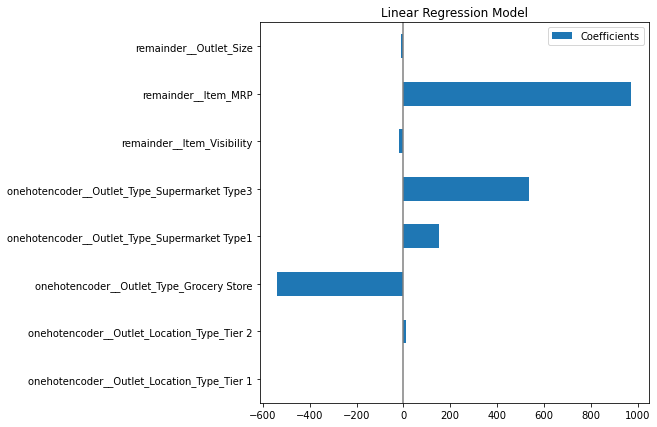

In [40]:
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Linear Regression Model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

- We can see that the variable "remainder_iteem_MRP" has a high positive importance. Followed by the variable "onehotencoder__Outlet_Type_Supermarket Type3".
- A negative significance is visualized for the variable "onehotencoder__Outlet_Type_Grocery Store", which being binary indicates a negative impact on sales when the store is not of this type.

Note: For the "winning" model, the polynomial, I did not find how to obtain its features importance (since its coefficients return 45 values and not 8 corresponding to the variables used in the model).

In [41]:
len(polynomial_linear_reg.coef_)

45

## Export best model

In [42]:
DATA_MODELS_PATH = '../data/models/'

In [43]:
pickle.dump(polynomial_linear_reg, open(DATA_MODELS_PATH+'polynomial_model.pkl', 'wb'))
pickle.dump(linear_regression, open(DATA_MODELS_PATH+'linear_regression.pkl', 'wb'))

Note: we also exported the linear model, which was the second with the best metrics, because when I upload the polynomial pikle file in the next step, it requires a much larger number of arguments for the predict than the existing ones and fails.